# SVM

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

## Linear dataset

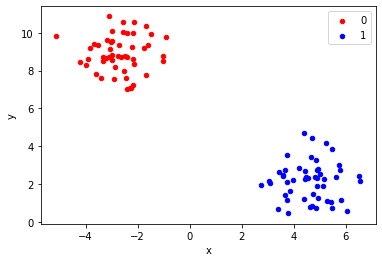

In [2]:
# generate 2d classification dataset
X, y = datasets.make_blobs(n_samples=100, centers=2, n_features=2,  random_state=42)
# X, y = datasets.make_circles(n_samples=100, noise=0)

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [3]:
# Linear SVM
svc = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
print("Accuracy", svc.score(X_test, y_test))

Accuracy 1.0


## Non-linear dataset

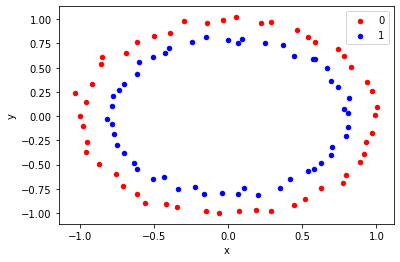

In [4]:
# generate 2d classification dataset
X, y = datasets.make_circles(n_samples=100, noise=0.025)

# Splitting dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# scatter plot, dots colored by class value
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('label')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])
plt.show()

In [5]:
# Linear SVM
svc = svm.SVC(kernel='linear', C=1).fit(X_train, y_train)
print("Accuracy", svc.score(X_test, y_test))

Accuracy 0.42424242424242425


In [6]:
# RBF SVM
svc = svm.SVC(kernel='rbf', C=1).fit(X_train, y_train)
print("Accuracy", svc.score(X_test, y_test))

Accuracy 0.8484848484848485


## Iris dataset

In [7]:
# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2] # we only take the first two features. We could
 # avoid this ugly slicing by using a two-dim dataset
y = iris.target

In [8]:
# create a mesh to plot in
def plot_mesh(svc, title):
  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  h = (x_max / x_min)/100
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
  np.arange(y_min, y_max, h))
  plt.subplot(1, 1, 1)
  Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, alpha=0.8)
  plt.scatter(X[:, 0], X[:, 1], c=y)
  plt.xlabel('Sepal length')
  plt.ylabel('Sepal width')
  plt.xlim(xx.min(), xx.max())
  plt.title(title)
  plt.show()

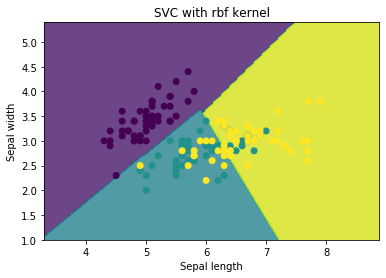

In [18]:
svc = svm.SVC(kernel='linear', C=1).fit(X, y)
plot_mesh(svc, title = "SVC with rbf kernel")


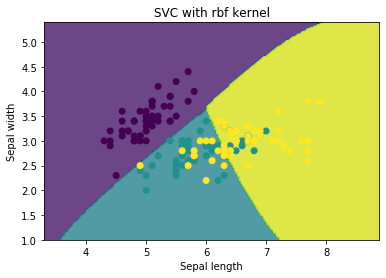

In [19]:
svc = svm.SVC(kernel='rbf', C=1).fit(X, y)
plot_mesh(svc, title = "SVC with rbf kernel")


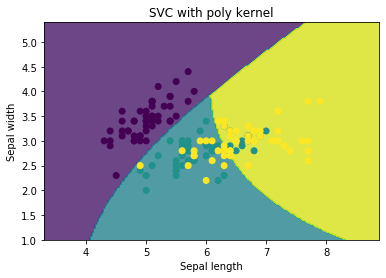

In [20]:
svc = svm.SVC(kernel='poly', C=1).fit(X, y)
plot_mesh(svc, title = "SVC with poly kernel")


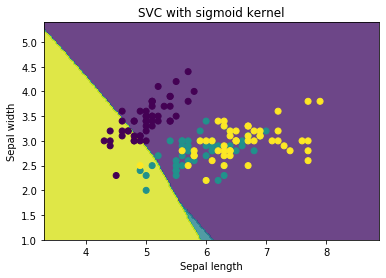

In [21]:
svc = svm.SVC(kernel='sigmoid', C=1).fit(X, y)
plot_mesh(svc, title = "SVC with sigmoid kernel")

# Ensemble

## Load Dataset

In [23]:
dataset = pd.read_csv('Social_Network_Ads.csv')
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


#### Train Test Split

In [24]:
X = dataset.drop(columns = ["Purchased"])
y = dataset["Purchased"]

In [25]:
X = pd.get_dummies(X)
X = X.drop(columns = ["User ID"])
X

,Age,EstimatedSalary,Gender_Female,Gender_Male
0,19,19000,0,1
1,35,20000,0,1
2,26,43000,1,0
3,27,57000,1,0
4,19,76000,0,1
...,...,...,...,...
395,46,41000,1,0
396,51,23000,0,1
397,50,20000,1,0
398,36,33000,0,1


In [26]:
y

0      0
1      0
2      0
3      0
4      0
      ..
395    1
396    1
397    1
398    0
399    1
Name: Purchased, Length: 400, dtype: int64

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

#### Feature Scaling

In [28]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

## Bagging

### BaggingClassifier

In [29]:
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

clf = BaggingClassifier(base_estimator=SVC(), n_estimators=10, random_state=42)
clf.fit(X_train, y_train)
print("Accuracy: ", clf.score(X_test, y_test))

Accuracy:  0.93


In [30]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
print("Accuracy: ", accuracy_score(y_pred, y_test))

Accuracy:  0.93


### Random Forest Classifier

In [31]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy: ", accuracy_score(y_pred, y_test))

Accuracy:  0.92


## Boosting

### Adaboost

In [32]:
from sklearn.ensemble import AdaBoostClassifier

clf = AdaBoostClassifier(n_estimators=50, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy: ", accuracy_score(y_pred, y_test))

Accuracy:  0.92


### GradientBoostingClassifier

In [33]:
from sklearn.ensemble import GradientBoostingClassifier

clf = GradientBoostingClassifier(n_estimators=50, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy: ", accuracy_score(y_pred, y_test))

Accuracy:  0.93


### XGBoost

In [35]:
pip install xgboost

     |████████████████████████████████| 1.2 MB 265 kB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [36]:
import xgboost as xgb

clf = xgb.XGBClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy: ", accuracy_score(y_pred, y_test))

XGBoostError: XGBoost Library (libxgboost.dylib) could not be loaded.
Likely causes:
  * OpenMP runtime is not installed (vcomp140.dll or libgomp-1.dll for Windows, libomp.dylib for Mac OSX, libgomp.so for Linux and other UNIX-like OSes). Mac OSX users: Run `brew install libomp` to install OpenMP runtime.
  * You are running 32-bit Python on a 64-bit OS
Error message(s): ['dlopen(/Users/ahmadwaliradhi/opt/anaconda3/lib/python3.7/site-packages/xgboost/lib/libxgboost.dylib, 6): Library not loaded: /usr/local/opt/libomp/lib/libomp.dylib\n  Referenced from: /Users/ahmadwaliradhi/opt/anaconda3/lib/python3.7/site-packages/xgboost/lib/libxgboost.dylib\n  Reason: image not found']


## Stacking

In [ ]:
from sklearn.ensemble import StackingClassifier
estimators = [
     ('svc', SVC()),
     ('knn', KNeighborsClassifier()),
     ('rf', RandomForestClassifier()),
     ]
clf = StackingClassifier(
      estimators=estimators, final_estimator=xgb.XGBClassifier()
      )
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print("Accuracy: ", accuracy_score(y_pred, y_test))

Accuracy:  0.94
